Using RCNN and trained 90k english words

In [169]:
from IPython.display import Image
import numpy as np
import pandas as pd
from PIL import Image as pilImg
import os 
import cv2
from datetime import datetime
import matplotlib.pyplot as plt
import itertools

In [170]:
def Extract_image_names(file_path,number):
    """
    Takes the file path of images annotation txt file with the number of images names to be extracted
    and returns the list of file names having label length <=12
    """
    with open(file_path) as f:
        file_names=f.readlines()
        f.close()
        count=0
        img_names=[]
        for file in file_names:
            _,label,_=file.split('_')
            if len(label)>=4 and len(label)<=12:
                img_names.append(file)
                count+=1
            if count==number:
                break
        images_names=['C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mjsynth/mnt/ramdisk/max/90kDICT32px'+x.strip() for x in img_names]
        return images_names

In [171]:
train_images= Extract_image_names('C:\\Users\\AkshayPatil\\Desktop\\Falcon\\PDF_OCR\\mjsynth\\mnt\\ramdisk\\max\\90kDICT32px/annotation_train.txt',200000)

In [172]:
train_images[:5]

['C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mjsynth/mnt/ramdisk/max/90kDICT32px./2425/1/115_Lube_45484.jpg 45484',
 'C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mjsynth/mnt/ramdisk/max/90kDICT32px./2425/1/114_Spencerian_73323.jpg 73323',
 'C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mjsynth/mnt/ramdisk/max/90kDICT32px./2425/1/112_CARPENTER_11682.jpg 11682',
 'C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mjsynth/mnt/ramdisk/max/90kDICT32px./2425/1/110_savannas_67969.jpg 67969',
 'C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mjsynth/mnt/ramdisk/max/90kDICT32px./2425/1/109_unfix_82473.jpg 82473']

In [173]:
def clean_file_names(file_names):
    clean_files=[]
    for file in file_names:
        main_folder,img_loc,extension=file.split('.')
        #Removing the image number at the end
        extension,_=extension.split(' ')
        img_file=main_folder+img_loc+'.'+extension
        clean_files.append(img_file)
    return clean_files

In [174]:
train_cleaned=clean_file_names(train_images)

In [175]:
train_cleaned[:5]

['C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mjsynth/mnt/ramdisk/max/90kDICT32px/2425/1/115_Lube_45484.jpg',
 'C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mjsynth/mnt/ramdisk/max/90kDICT32px/2425/1/114_Spencerian_73323.jpg',
 'C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mjsynth/mnt/ramdisk/max/90kDICT32px/2425/1/112_CARPENTER_11682.jpg',
 'C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mjsynth/mnt/ramdisk/max/90kDICT32px/2425/1/110_savannas_67969.jpg',
 'C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mjsynth/mnt/ramdisk/max/90kDICT32px/2425/1/109_unfix_82473.jpg']

In [176]:
train_data=pd.DataFrame({'ImageName':train_cleaned})

In [177]:
train_data.head()

,ImageName
0,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...
1,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...
2,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...
3,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...
4,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...


In [178]:
def extract_ground_truth(files):
    """
    Given the file names of images, extracts the Ground Truth Values and returns a list of Ground Truth Labels in All Capitals
    """
    txt_labels=[]
    for file in files:
        *folder,ground_truth,image=file.split('_')
        ground_truth=ground_truth.upper()
        txt_labels.append(ground_truth)
    return txt_labels  

In [179]:
Train_ground_truths=extract_ground_truth(train_cleaned)

In [180]:
train_data['Labels']=Train_ground_truths

In [181]:
train_data.head()

,ImageName,Labels
0,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...,LUBE
1,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...,SPENCERIAN
2,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...,CARPENTER
3,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...,SAVANNAS
4,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...,UNFIX


In [182]:
train_data.to_csv('Train_data.csv')

In [183]:
Validation_images=Extract_image_names('C:\\Users\\AkshayPatil\\Desktop\\Falcon\\PDF_OCR\\mjsynth\\mnt\\ramdisk\\max\\90kDICT32px/annotation_val.txt',12000)

In [184]:
val_cleaned=clean_file_names(Validation_images)

In [185]:
val_data=pd.DataFrame({'ImageName':val_cleaned})

In [186]:
val_data.head()

,ImageName
0,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...
1,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...
2,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...
3,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...
4,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...


In [187]:
Val_ground_truths=extract_ground_truth(val_cleaned)

In [188]:
val_data['Labels']=Val_ground_truths

In [189]:
val_data.head()

,ImageName,Labels
0,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...,MONIKER
1,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...,FIRESTORM
2,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...,REPURCHASES
3,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...,PIGTAIL
4,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...,LANDLADIES


In [190]:
val_data.to_csv('Validation_data.csv')

In [191]:
test_images=Extract_image_names('C:\\Users\\AkshayPatil\\Desktop\\Falcon\\PDF_OCR\\mjsynth\\mnt\\ramdisk\\max\\90kDICT32px/annotation_test.txt',15000)

In [192]:
test_cleaned=clean_file_names(test_images)

In [193]:
test_data=pd.DataFrame({'ImageName':test_cleaned})

In [194]:
test_data.head()

,ImageName
0,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...
1,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...
2,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...
3,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...
4,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...


In [195]:
test_ground_truths=extract_ground_truth(test_cleaned)

In [196]:
test_data['Labels']=test_ground_truths

In [197]:
test_data.head()

,ImageName,Labels
0,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...,SLINKING
1,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...,REMODELERS
2,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...,CHRONOGRAPHS
3,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...,IMPEACHING
4,C:/Users/AkshayPatil/Desktop/Falcon/PDF_OCR/mj...,LOOTS


In [198]:
test_data.to_csv('Test_data.csv')

In [199]:
def img_store_single_channel(destination_folder,files):
    """
    Takes the images in a folder, distination folder path and 
    converts the image to single channel gray scale,
    stores the image in the destination folder and returns image destination list
    """
    start=datetime.now()
    destination_list=[]
    count=1
    for file in files:
        #Removing the extra folder structures
        *_,_,_,Name=file.split('/')
        _,img,_=Name.split('_')
        destination=destination_folder+str(count)+'_'+img+'.jpg'
        cv_img=cv2.imread(file)
        #print(cv_img)
        height, *width = cv_img.shape
        dim = [height, width]
        #So extracting image from any 1 channel gives a single channel Grayscale image
        cv_img_sc=cv2.resize(cv_img, dsize=(128,128))
        cv2.imwrite(destination,cv_img_sc)
        destination_list.append(destination)
        count+=1
#         if count%10000==0:
#             print("Processed Images: ",count)
    print('Time Taken for Processing: ',datetime.now() - start)
    return destination_list

Processing Train Data

In [200]:
train_data=pd.read_csv('Train_data.csv')

In [201]:
train_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [202]:
train_files=train_data['ImageName'].values

In [203]:
train_dest=img_store_single_channel('C:\\Users\\AkshayPatil\\Desktop\\Falcon\\PDF_OCR/Train_data/',train_files)

Time Taken for Processing:  0:05:30.214053


In [204]:
#Updating Train Dataframe with new destination file paths
train_data['ImageName']=train_dest

In [205]:
train_data.head()

,ImageName,Labels
0,C:\Users\AkshayPatil\Desktop\Falcon\PDF_OCR/Tr...,LUBE
1,C:\Users\AkshayPatil\Desktop\Falcon\PDF_OCR/Tr...,SPENCERIAN
2,C:\Users\AkshayPatil\Desktop\Falcon\PDF_OCR/Tr...,CARPENTER
3,C:\Users\AkshayPatil\Desktop\Falcon\PDF_OCR/Tr...,SAVANNAS
4,C:\Users\AkshayPatil\Desktop\Falcon\PDF_OCR/Tr...,UNFIX


In [206]:
train_data.to_csv('Train_Final.csv')

Processing Validation Data

In [207]:
val_data=pd.read_csv('Validation_data.csv')

In [208]:
val_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [209]:
val_files=val_data['ImageName'].values

In [210]:
val_dest=img_store_single_channel('C:\\Users\\AkshayPatil\\Desktop\\Falcon\\PDF_OCR\\val_data/',val_files)

Time Taken for Processing:  0:00:23.441130


In [211]:
#Updating Validation Dataframe with new destination file paths
val_data['ImageName']=val_dest

In [212]:
val_data.head()

,ImageName,Labels
0,C:\Users\AkshayPatil\Desktop\Falcon\PDF_OCR\va...,MONIKER
1,C:\Users\AkshayPatil\Desktop\Falcon\PDF_OCR\va...,FIRESTORM
2,C:\Users\AkshayPatil\Desktop\Falcon\PDF_OCR\va...,REPURCHASES
3,C:\Users\AkshayPatil\Desktop\Falcon\PDF_OCR\va...,PIGTAIL
4,C:\Users\AkshayPatil\Desktop\Falcon\PDF_OCR\va...,LANDLADIES


In [213]:
#Saving the updated Validation Dataframe
val_data.to_csv('Validation_Final.csv')

Processing Test Data

In [214]:
test_data=pd.read_csv('Test_data.csv')

In [215]:
test_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [216]:
test_files=test_data['ImageName'].values

In [217]:
test_dest=img_store_single_channel('C:\\Users\\AkshayPatil\\Desktop\\Falcon\\PDF_OCR\\Test_data/',test_files)

Time Taken for Processing:  0:00:29.739609


In [218]:
#Updating Test Dataframe with new destination file paths
test_data['ImageName']=test_dest

In [219]:
test_data.head()

,ImageName,Labels
0,C:\Users\AkshayPatil\Desktop\Falcon\PDF_OCR\Te...,SLINKING
1,C:\Users\AkshayPatil\Desktop\Falcon\PDF_OCR\Te...,REMODELERS
2,C:\Users\AkshayPatil\Desktop\Falcon\PDF_OCR\Te...,CHRONOGRAPHS
3,C:\Users\AkshayPatil\Desktop\Falcon\PDF_OCR\Te...,IMPEACHING
4,C:\Users\AkshayPatil\Desktop\Falcon\PDF_OCR\Te...,LOOTS


In [220]:
#Saving the updated Test Dataframe
test_data.to_csv('Test_Final.csv')

7. Exploratory Data Analysis

7.1. Image Size Analysis

In [221]:
train_data=pd.read_csv('Train_data.csv')
val_data=pd.read_csv('Validation_Data.csv')
test_data=pd.read_csv('Test_Data.csv')

In [222]:
def Write_Image_Sizes(filenames,storage_file):
    """
    Takes the File names, writes the width and height of images in csv along with file names
    """
    store_file=open(storage_file,'w+')
    store_file.write("ImageName,Height,Width")
    store_file.write("\n")
    cnt=0
    for file in filenames:
        cv_img=cv2.imread(file)
        #img.shape gives (img_height,img_width,img_channel)
        store_file.write(str(file)+","+str(cv_img.shape[0])+","+str(cv_img.shape[1]))
        store_file.write("\n")
        cnt+=1
        if cnt%10000==0:
            print("Processed Images: ",cnt)
    store_file.close()       

In [223]:
train_image_names=list(train_data['ImageName'].values)
val_image_names=list(val_data['ImageName'].values)
test_image_names=list(test_data['ImageName'].values)

In [224]:
Write_Image_Sizes(train_image_names,'Train_image_sizes.csv')

Processed Images:  10000
Processed Images:  20000
Processed Images:  30000
Processed Images:  40000
Processed Images:  50000
Processed Images:  60000
Processed Images:  70000
Processed Images:  80000
Processed Images:  90000
Processed Images:  100000
Processed Images:  110000
Processed Images:  120000
Processed Images:  130000
Processed Images:  140000
Processed Images:  150000
Processed Images:  160000
Processed Images:  170000
Processed Images:  180000
Processed Images:  190000
Processed Images:  200000


In [225]:
Write_Image_Sizes(val_image_names,'Validation_image_sizes.csv')

Processed Images:  10000


In [226]:
Write_Image_Sizes(test_image_names,'Test_image_sizes.csv')

Processed Images:  10000


In [227]:
train_img_size=pd.read_csv('Train_image_sizes.csv')
val_img_size=pd.read_csv('Validation_image_sizes.csv')
test_img_size=pd.read_csv('Test_image_sizes.csv')

In [228]:
train_img_size.describe()

,Height,Width
count,200000.000000,200000.000000
mean,31.038550,115.668015
std,0.333698,39.696249
min,9.000000,1.000000
25%,31.000000,88.000000
50%,31.000000,109.000000
75%,31.000000,136.000000
max,32.000000,608.000000


In [229]:
val_img_size.describe()

,Height,Width
count,12000.000000,12000.000000
mean,31.037083,115.644167
std,0.326421,39.476965
min,16.000000,25.000000
25%,31.000000,88.000000
50%,31.000000,110.000000
75%,31.000000,136.000000
max,32.000000,440.000000


In [230]:
test_img_size.describe()

,Height,Width
count,15000.000000,15000.000000
mean,31.040600,115.166000
std,0.353497,39.400603
min,6.000000,1.000000
25%,31.000000,87.000000
50%,31.000000,109.000000
75%,31.000000,136.000000
max,32.000000,464.000000


Observation

In [231]:
print("Train Images Height 90 percentile :",np.percentile(train_img_size['Height'].values,90))
print("Train Images Height 99 percentile :",np.percentile(train_img_size['Height'].values,99))
print("Train Images Width 90 percentile :",np.percentile(train_img_size['Width'].values,90))
print("Train Images Width 99 percentile :",np.percentile(train_img_size['Width'].values,99))
print("="*60)
print("Validation Images Height 90 percentile :",np.percentile(val_img_size['Height'].values,90))
print("Validation Images Height 99 percentile :",np.percentile(val_img_size['Height'].values,99))
print("Validation Images Width 90 percentile :",np.percentile(val_img_size['Width'].values,90))
print("Validation Images Width 99 percentile :",np.percentile(val_img_size['Width'].values,99))
print("="*60)
print("Test Images Height 90 percentile :",np.percentile(test_img_size['Height'].values,90))
print("Test Images Height 99 percentile :",np.percentile(test_img_size['Height'].values,99))
print("Test Images Width 90 percentile :",np.percentile(test_img_size['Width'].values,90))
print("Test Images Width 99 percentile :",np.percentile(test_img_size['Width'].values,99))

Train Images Height 90 percentile : 31.0
Train Images Height 99 percentile : 32.0
Train Images Width 90 percentile : 167.0
Train Images Width 99 percentile : 240.0
Validation Images Height 90 percentile : 31.0
Validation Images Height 99 percentile : 32.0
Validation Images Width 90 percentile : 167.0
Validation Images Width 99 percentile : 239.0
Test Images Height 90 percentile : 31.0
Test Images Height 99 percentile : 32.0
Test Images Width 90 percentile : 167.0
Test Images Width 99 percentile : 235.0


In [232]:
for i in range(10):
    print("Train Images Width "+str(90+i)+ " percentile :",np.percentile(train_img_size['Width'].values,90+i))
print("="*60)
for i in range(10):
    print("Validation Images Width "+str(90+i)+ " percentile :",np.percentile(val_img_size['Width'].values,90+i))
print("="*60)
for i in range(10):
    print("Test Images Width "+str(90+i)+ " percentile :",np.percentile(test_img_size['Width'].values,90+i))

Train Images Width 90 percentile : 167.0
Train Images Width 91 percentile : 170.0
Train Images Width 92 percentile : 174.0
Train Images Width 93 percentile : 178.0
Train Images Width 94 percentile : 183.0
Train Images Width 95 percentile : 189.0
Train Images Width 96 percentile : 196.0
Train Images Width 97 percentile : 205.0
Train Images Width 98 percentile : 218.0
Train Images Width 99 percentile : 240.0
Validation Images Width 90 percentile : 167.0
Validation Images Width 91 percentile : 170.0
Validation Images Width 92 percentile : 174.0
Validation Images Width 93 percentile : 179.0
Validation Images Width 94 percentile : 184.0
Validation Images Width 95 percentile : 190.0
Validation Images Width 96 percentile : 197.0
Validation Images Width 97 percentile : 206.0
Validation Images Width 98 percentile : 217.02000000000044
Validation Images Width 99 percentile : 239.0
Test Images Width 90 percentile : 167.0
Test Images Width 91 percentile : 171.0
Test Images Width 92 percentile : 174

In [244]:
import re
def hasDigits(inputText):
    """
    Returns True if the given input text has digits in it otherwise returns False
    """
    return bool(re.search(r'\d', inputText))

In [245]:
def digit_count(labels,size):
    """
    Takes the list of labels and counts the number of labels with and without digits
    and prints its percentage
    """
    present=0
    absent=0
    for i in labels:
        pres=hasDigits(i)
        if pres==True:
            present+=1
        else:
            absent+=1
    present_percent=(present/size)*100
    absent_percent=(absent/size)*100
    print('Labels with Digits: ',present_percent,' %')
    print('Labels without Digits: ',absent_percent,' %')  

7.2.1. Train Data

In [246]:
train_data=pd.read_csv('Train_data.csv')

In [247]:
train_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [248]:
train_label_len=[len(str(x)) for x in train_data['Labels'].values]

In [249]:
#Saving the updated Train Dataframe
train_data.to_csv('Train_Final.csv')

In [250]:
from collections import Counter

In [251]:
train_label_len_dict=Counter(train_label_len)

In [252]:
#Printing Value counts of Label Lengths 
train_label_len_dict

Counter({4: 9160,
         10: 23919,
         9: 30503,
         8: 34304,
         5: 16790,
         6: 25596,
         12: 9877,
         7: 33812,
         11: 16036,
         3: 3})

In [253]:
# https://stackoverflow.com/questions/20944483/python-3-sort-a-dict-by-its-values
#Sorting dict by value in decending order and storing keys
train_keys = [k for k in sorted(train_label_len_dict, key=train_label_len_dict.get, reverse=True)]

In [254]:
#Taking Top 5 keys with highest values 
train_top_keys=train_keys[:5]
train_top_values=[train_label_len_dict.get(k) for k in train_top_keys]

Train Data Label Lengths PDF

Train Data Digit Presence Percentage

In [258]:
train_labels=[str(x) for x in train_data['Labels'].values]
digit_count(train_labels,len(train_labels))

Labels with Digits:  0.07050000000000001  %
Labels without Digits:  99.9295  %


7.2.2. Validation Data

In [259]:
val_data=pd.read_csv('Validation_data.csv')

In [260]:
val_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [261]:
val_label_len=[len(str(x)) for x in val_data['Labels'].values]

In [262]:
val_label_len_dict=Counter(val_label_len)

In [263]:
#Printing Value counts of Label Lengths 
val_label_len_dict

Counter({7: 2078,
         9: 1817,
         11: 942,
         10: 1525,
         8: 1944,
         5: 1002,
         12: 619,
         6: 1584,
         4: 489})

In [264]:
# https://stackoverflow.com/questions/20944483/python-3-sort-a-dict-by-its-values
#Sorting dict by value in decending order and storing keys
val_keys = [k for k in sorted(val_label_len_dict, key=val_label_len_dict.get, reverse=True)]

In [265]:
#Taking Top 5 keys with highest values 
val_top_keys=val_keys[:5]
val_top_values=[val_label_len_dict.get(k) for k in val_top_keys]

Validation Data Digit Presence Percentage

In [269]:
val_labels=[str(x) for x in val_data['Labels'].values]
digit_count(val_labels,len(val_labels))

Labels with Digits:  0.09166666666666666  %
Labels without Digits:  99.90833333333333  %


7.2.3. Test Data

In [270]:
test_data=pd.read_csv('Test_data.csv')

In [271]:
test_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [272]:
test_label_len=[len(str(x)) for x in test_data['Labels'].values]

In [273]:
test_label_len_dict=Counter(test_label_len)

In [274]:
#Printing Value counts of Label Lengths 
test_label_len_dict

Counter({8: 2490,
         10: 1742,
         12: 730,
         5: 1317,
         9: 2271,
         11: 1255,
         7: 2495,
         6: 1990,
         4: 710})

In [275]:
# https://stackoverflow.com/questions/20944483/python-3-sort-a-dict-by-its-values
#Sorting dict by value in decending order and storing keys
test_keys = [k for k in sorted(test_label_len_dict, key=test_label_len_dict.get, reverse=True)]

In [276]:
#Taking Top 5 keys with highest values 
test_top_keys=test_keys[:5]
test_top_values=[test_label_len_dict.get(k) for k in test_top_keys]

Test Data Top 5 Label Lengths Count(%) Bar Graph

In [279]:
test_labels=[str(x) for x in test_data['Labels'].values]
digit_count(test_labels,len(test_labels))

Labels with Digits:  0.08666666666666667  %
Labels without Digits:  99.91333333333333  %


Label Letters Data Analysis

In [280]:
train_data=pd.read_csv('Train_Final.csv')
val_data=pd.read_csv('Validation_Final.csv')
test_data=pd.read_csv('Test_Final.csv')

In [281]:
letters='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
train_labels_combined=' '.join([str(x) for x in train_data['Labels'].values])
val_labels_combined=' '.join([str(x) for x in val_data['Labels'].values])
test_labels_combined=' '.join([str(x) for x in test_data['Labels'].values])

In [282]:
def letters_list(letter,combined_labels):
    """
    Takes the letters, combined labels text checks for the presence of each letter and returns a list of letters 
    present in the combined labels
    """
    letter_list=[]
    for i in range(len(letter)):
        if letter[i] in combined_labels:
            letter_list.append(letter[i])
    return letter_list

In [283]:
train_letter_set=set(letters_list(letters,train_labels_combined))
val_letter_set=set(letters_list(letters,val_labels_combined))
test_letter_set=set(letters_list(letters,test_labels_combined))

In [284]:
print("Number of unique Letters in Train Data: ",len(train_letter_set))
print("Number of unique Letters in Validation Data: ",len(val_letter_set))
print("Number of unique Letters in Test Data: ",len(test_letter_set))

Number of unique Letters in Train Data:  26
Number of unique Letters in Validation Data:  26
Number of unique Letters in Test Data:  26


8. Utility Functions

In [285]:
import keras
import random
from keras import backend as K
import warnings
warnings.filterwarnings("ignore")

In [286]:
#Letters present in the Label Text
letters= '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [287]:
#image height
img_h=32
#image width
img_w=170
#image Channels
img_c=1
# classes for softmax with number of letters +1 for blank space in ctc
num_classes=len(letters)+1
batch_size=64
max_length=15 # considering max length of ground truths labels to be 15

In [288]:
def encode_words_labels(word):
    """
    Encodes the Ground Truth Labels to a list of Values like eg.HAT returns [17,10,29]
    """
    label_lst=[]
    for char in word:
        label_lst.append(letters.find(char)) # keeping 0 for blank and for padding labels
    return label_lst

In [289]:
def words_from_labels(labels):
    """
    converts the list of encoded integer labels to word strings like eg. [12,10,29] returns CAT 
    """
    txt=[]
    for ele in labels:
        if ele == len(letters): # CTC blank space
            txt.append("")
        else:
            #print(letters[ele])
            txt.append(letters[ele])
    return "".join(txt)

In [290]:
def ctc_loss_function(args):
    """
    CTC loss function takes the values passed from the model returns the CTC loss using Keras Backend ctc_batch_cost function
    """
    y_pred, y_true, input_length, label_length = args 
    # since the first couple outputs of the RNN tend to be garbage we need to discard them, found this from other CRNN approaches
    # I Tried by including these outputs but the results turned out to be very bad and got very low accuracies on prediction 
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(y_true, y_pred, input_length, label_length)

9. Data Generation

In [291]:
#https://github.com/qjadud1994/CRNN-Keras
#https://keras.io/examples/image_ocr/

class DataGenerator(keras.callbacks.Callback):
    def __init__(self, img_dirpath, img_w, img_h,
                 batch_size,n,output_labels,max_text_len=15):
        self.img_h = img_h                    #Image Height
        self.img_w = img_w                    #Image Width
        self.batch_size = batch_size          #Batch size of Input
        self.max_text_len = max_text_len      #Maximum Text length of Labels
        
#         self.n =len(self.img_dir)                           #Number of images in img_matrix
        self.n=n
        self.img_dir = img_dirpath[:self.n]     # images list
        self.indexes = list(range(self.n))   #List of indices for each image in img_matrix
        self.cur_index = 0                   #Current index which points to image being loaded 
        self.imgs = np.zeros((self.n, self.img_h, self.img_w))
        self.texts =  output_labels[:self.n]                  #List of Ground Truth Label texts

   
    def build_data(self):
        """
        Build The Image Data
        """
        print(self.n, " Image Loading start...")
        for i, img_file in enumerate(self.img_dir):
            img = cv2.imread(img_file)
            img = img[:,:,1]                               #Extracting Single Channel Image
            img = cv2.resize(img, (self.img_w, self.img_h))
            img = img /255
            self.imgs[i, :, :]= img
            if i%10000==0:
                print("Loaded Images: ",i)
           
        print("Number of Texts matches with Total Number of Images :",len(self.texts) == self.n)
        print(self.n, " Image Loading finish...")


    def next_data(self): 
        """
        Returns image and text data pointed by the current index
        """
        self.cur_index += 1
        #If current index becomes more than the number of images, make current index 0 
        #and shuffle the indices list for random picking of image and text data
        if self.cur_index >= self.n:
            self.cur_index = 0
            random.shuffle(self.indexes)
        return self.imgs[self.indexes[self.cur_index]], self.texts[self.indexes[self.cur_index]]

    def next_batch(self):
        """
        Creates a batch of images images and text data equal to the batch_size,
        computes the parameters needed for CTC and returns the inputs to the Model
        """
        while True:
            X_data = np.ones([self.batch_size, self.img_w, self.img_h, 1])  #Single channel Gray Size Scale images for input
            #Initilizing with -1 to aid for padding labels of different lengths
            Y_data = np.ones([self.batch_size, self.max_text_len])* -1        #Text labels for input
           #input_length for CTC which is the number of time-steps of the RNN output
            input_length = np.ones((self.batch_size, 1)) * 40
            label_length = np.zeros((self.batch_size, 1))                   #label length for CTC
            source_str=[]                                                   #List to store Ground Truth Labels
            for i in range(self.batch_size):
                img, text = self.next_data() #getting the image and text data pointed by current index
                                    #taking transpose of image
                img=img.T
                img = np.expand_dims(img, -1)  #expanding image to have a single channel
                X_data[i] = img
                label=encode_words_labels(text) # encoding label text to integer list and storing in temp label variable
                lbl_len=len(label)
                Y_data[i,0:lbl_len] = label #Storing the label till its length and padding others
                label_length[i] = len(label)
                source_str.append(text) #storing Ground Truth Labels which will be accessed as reference for calculating metrics
            
        #Preparing the input for the Model
            inputs = {
                'img_input': X_data,  
                'ground_truth_labels': Y_data,  
                'input_length': input_length,  
                'label_length': label_length,
                'source_str': source_str  # used for visualization only
            }
            #Preparing output for the Model and intializing to zeros
            outputs = {'ctc': np.zeros([self.batch_size])}  
            yield (inputs, outputs) # Return the Prepared input and output to the Model

12. Model Implementation

In [292]:
from keras.layers import Input, Conv2D, MaxPool2D, Dense,MaxPooling2D
from keras.layers import AveragePooling2D, Flatten, Activation, Bidirectional
from keras.layers import BatchNormalization, Dropout
from keras.layers import Concatenate, Add, Multiply, Lambda
from keras.layers import UpSampling2D, Reshape
from keras.layers import add,concatenate
from keras.layers import Reshape
from keras.models import Model
from keras.layers import LSTM,GRU
import tensorflow as tf

12.1. Model 1

Model with Bi-Directional LSTM units and Adam Optimizer

In [293]:
def Image_text_recogniser_model_1(stage,drop_out_rate=0.35):
    """
    Builds the model by taking in the stage variable which specifes the stage,
    if the stage is training: model takes inputs required for computing ctc_batch_cost function
    else : model takes input as images which is used for prediction
    """
    
    if K.image_data_format() == 'channels_first':
        input_shape = (1, img_w, img_h)
    else:
        input_shape = (img_w, img_h, 1)
       
    model_input=Input(shape=input_shape,name='img_input',dtype='float32')

    # Convolution layer 
    model = Conv2D(64, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(model_input) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(2, 2), name='max1')(model) 

    model = Conv2D(128, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(model) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(2, 2), name='max2')(model) 

    model = Conv2D(256, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(model) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = Conv2D(256, (3, 3), padding='same', name='conv4', kernel_initializer='he_normal')(model)
    model=Dropout(drop_out_rate)(model)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(1, 2), name='max3')(model)  

    model = Conv2D(512, (3, 3), padding='same', name='conv5', kernel_initializer='he_normal')(model) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = Conv2D(512, (3, 3), padding='same', name='conv6')(model)
    model=Dropout(drop_out_rate)(model)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(1, 2), name='max4')(model) 

    model = Conv2D(512, (2, 2), padding='same', kernel_initializer='he_normal', name='con7')(model)
    model=Dropout(0.25)(model)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)    

    # CNN to RNN
    model = Reshape(target_shape=((42, 1024)), name='reshape')(model)  
    model = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(model)  

    # RNN layer
    model=Bidirectional(LSTM(256, return_sequences=True, kernel_initializer='he_normal'), merge_mode='sum')(model)
    model=Bidirectional(LSTM(256, return_sequences=True, kernel_initializer='he_normal'), merge_mode='concat')(model)

    # transforms RNN output to character activations:
    model = Dense(num_classes, kernel_initializer='he_normal',name='dense2')(model) 
    y_pred = Activation('softmax', name='softmax')(model)

    
    labels = Input(name='ground_truth_labels', shape=[max_length], dtype='float32') 
    input_length = Input(name='input_length', shape=[1], dtype='int64') 
    label_length = Input(name='label_length', shape=[1], dtype='int64') 

    #CTC loss function
    loss_out = Lambda(ctc_loss_function, output_shape=(1,),name='ctc')([y_pred, labels, input_length, label_length]) #(None, 1)

    if stage=='train':
        return model_input,y_pred,Model(inputs=[model_input, labels, input_length, label_length], outputs=loss_out)
    else:
        return Model(inputs=[model_input], outputs=y_pred)

In [294]:
model_input,y_pred,img_text_recog=Image_text_recogniser_model_1('train')

In [295]:
#used for visualization
# it is a keras backend function used to capture the model ouputs so that it can be used for decoding and calculating metrics
test_func = K.function([model_input], [y_pred])

In [296]:
img_text_recog.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img_input (InputLayer)         [(None, 170, 32, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1 (Conv2D)                 (None, 170, 32, 64)  640         ['img_input[0][0]']              
                                                                                                  
 batch_normalization_21 (BatchN  (None, 170, 32, 64)  256        ['conv1[0][0]']                  
 ormalization)                                                                                    
                                                                                            

In [297]:
def decode_batch(test_func, word_batch):
    """
    Takes the Batch of Predictions and decodes the Predictions by Best Path Decoding and Returns the Output
    """
    out = test_func([word_batch])[0] #returns the predicted output matrix of the model
    ret = []
    for j in range(out.shape[0]):
        out_best = list(np.argmax(out[j, 2:], 1))
        out_best = [k for k, g in itertools.groupby(out_best)]
        outstr = words_from_labels(out_best)
        ret.append(outstr)
    return ret

In [298]:
def accuracies(actual_labels,predicted_labels,is_train):
    """
    Takes a List of Actual Outputs, predicted Outputs and returns their accuracy and letter accuracy across
    all the labels in the list
    """
    accuracy=0
    letter_acc=0
    letter_cnt=0
    count=0
    for i in range(len(actual_labels)):
        predicted_output=predicted_labels[i]
        actual_output=actual_labels[i]
        count+=1
        for j in range(min(len(predicted_output),len(actual_output))):
            if predicted_output[j]==actual_output[j]:
                letter_acc+=1
        letter_cnt+=max(len(predicted_output),len(actual_output))
        if actual_output==predicted_output:
            accuracy+=1
    final_accuracy=np.round((accuracy/len(actual_labels))*100,2)
    final_letter_acc=np.round((letter_acc/letter_cnt)*100,2)
    return final_accuracy,final_letter_acc

In [299]:
#https://keras.io/examples/image_ocr/
class VizCallback(keras.callbacks.Callback):
    """
    The Custom Callback created for printing the Accuracy and Letter Accuracy Metrics at the End of Each Epoch
    """

    def __init__(self, test_func, text_img_gen,is_train,acc_compute_batches):
        self.test_func = test_func
        self.text_img_gen = text_img_gen
        self.is_train=is_train                #used to indicate whether the callback is called to for Train or Validation Data
        self.acc_batches=acc_compute_batches  # Number of Batches for which the metrics are computed typically equal to steps/epoch

    def show_accuracy_metrics(self,num_batches):
        """
        Calculates the accuracy and letter accuracy for each batch of inputs, 
        and prints the avarage accuracy and letter accuracy across all the batches
        """
        accuracy=0
        letter_accuracy=0
        batches_cnt=num_batches
        while batches_cnt>0:
            word_batch = next(self.text_img_gen)[0]   #Gets the next batch from the Data generator
            decoded_res = decode_batch(self.test_func,word_batch['img_input'])
            actual_res=word_batch['source_str']
            acc,let_acc=accuracies(actual_res,decoded_res,self.is_train)
            accuracy+=acc
            letter_accuracy+=let_acc
            batches_cnt-=1
        accuracy=accuracy/num_batches
        letter_accuracy=letter_accuracy/num_batches
        if self.is_train:
            print("Train Average Accuracy of "+str(num_batches)+" Batches: ",np.round(accuracy,2)," %")
            print("Train Average Letter Accuracy of "+str(num_batches)+" Batches: ",np.round(letter_accuracy,2)," %")
        else:
            print("Validation Average Accuracy of "+str(num_batches)+" Batches: ",np.round(accuracy,2)," %")
            print("Validation Average Letter Accuracy of "+str(num_batches)+" Batches: ",np.round(letter_accuracy,2)," %")
            
        
    def on_epoch_end(self, epoch, logs={}):
        self.show_accuracy_metrics(self.acc_batches)

In [300]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [301]:
import datetime

In [302]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
early_stop=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)
model_chk_pt=ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=False,save_weights_only=True,verbose=0, mode='auto', save_freq='epoch')

In [303]:
logdir = os.path.join("logs_127", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [304]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [305]:
%tensorboard --logdir logs_127

Reusing TensorBoard on port 6006 (pid 8384), started 8 days, 19:17:22 ago. (Use '!kill 8384' to kill it.)

Labels Loading

In [138]:
#Loading Train Data Labels
Train_labels=[str(x) for x in train_data['Labels'].values]

In [139]:
train_paths=[str(x) for x in train_data['ImageName'].values]

In [140]:
train_nan_cnt=0
train_nan_replaced=False
for i in range(len(Train_labels)):
    if Train_labels[i]=='nan':
        Train_labels[i]='NULL'
        train_nan_replaced=True
        train_nan_cnt+=1

In [141]:
print('Was there any NULL values written as Nan in Train Data:',train_nan_replaced)
print('Train Nan count: ',train_nan_cnt)

Was there any NULL values written as Nan in Train Data: True
Train Nan count:  3


In [142]:
#Loading Validation Data Labels
cv_labels=[str(x) for x in val_data['Labels'].values]

In [143]:
val_path=[str(x) for x in val_data['ImageName'].values]

In [144]:
val_nan_cnt=0
val_nan_replaced=False
for i in range(len(cv_labels)):
    if cv_labels[i]=='nan':
        cv_labels[i]='NULL'
        val_nan_replaced=True
        val_nan_cnt+=1

In [145]:
print('Was there any NULL values written as Nan :',val_nan_replaced)
print('Validation Nan count: ',val_nan_cnt)

Was there any NULL values written as Nan : False
Validation Nan count:  0


Instatiating Data Generator

In [146]:
train_gene=DataGenerator(train_paths,img_w, img_h,batch_size,200000,Train_labels)

In [147]:
train_gene.build_data()

200000  Image Loading start...
Loaded Images:  0
Loaded Images:  10000
Loaded Images:  20000
Loaded Images:  30000
Loaded Images:  40000
Loaded Images:  50000
Loaded Images:  60000
Loaded Images:  70000
Loaded Images:  80000
Loaded Images:  90000
Loaded Images:  100000
Loaded Images:  110000
Loaded Images:  120000
Loaded Images:  130000
Loaded Images:  140000
Loaded Images:  150000
Loaded Images:  160000
Loaded Images:  170000
Loaded Images:  180000
Loaded Images:  190000
Number of Texts matches with Total Number of Images : True
200000  Image Loading finish...


In [148]:
train_num_batches=int(train_gene.n / batch_size)

In [149]:
viz_cb_train = VizCallback( test_func, train_gene.next_batch(),True,train_num_batches)

In [150]:
val_gen=DataGenerator(val_path,img_w, img_h,batch_size,12000,cv_labels)

In [151]:
val_gen.build_data()

12000  Image Loading start...
Loaded Images:  0
Loaded Images:  10000
Number of Texts matches with Total Number of Images : True
12000  Image Loading finish...


In [152]:
val_num_batches=int(val_gen.n / batch_size)

In [153]:
viz_cb_val = VizCallback( test_func, val_gen.next_batch(),False,val_num_batches)

Defining Optimizer

In [154]:
from keras import optimizers
adam=optimizers.Adam()

In [155]:
#Creating a Dummy Loss function as in Keras there is no CTC loss implementation which actually takes 4 inputs 
#The loss function in keras accepts only 2 inputs, so create a dummy loss which is a work around for implementing CTC in Keras
#The Actual loss computation happens in ctc_loss_function defined above
img_text_recog.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=adam)

12.1.1. Train Model 1

In [189]:
img_text_recog.fit_generator(train_gene.next_batch(),
                    steps_per_epoch=int(train_gene.n / batch_size),
                    epochs=1,
                    callbacks=[viz_cb_train,viz_cb_val,train_gene,val_gen,tensorboard_callback,early_stop,model_chk_pt],
                    validation_data=val_gen.next_batch(),
                    validation_steps=int(val_gen.n / batch_size))
#callbacks=[viz_cb_train,viz_cb_val,train_gene,val_gen,tensorboard_callback,early_stop,model_chk_pt],

Epoch 1/5


KeyboardInterrupt: 

In [ ]:
img_text_recog.save('Best_Img_recog_LSTM_Adam_model_run_weights.h5')

In [ ]:
img_text_recog.save('Img_recog_LSTM_Adam_model_run_3.h5')

12.2. Model 2

In [156]:
def Image_text_recogniser_model_2(stage,drop_out_rate=0.35):
    """
    Builds the model by taking in the stage variable which specifes the stage,
    if the stage is training: model takes inputs required for computing ctc_batch_cost function
    else : model takes input as images which is used for prediction
    """
    
    if K.image_data_format() == 'channels_first':
        input_shape = (1, img_w, img_h)
    else:
        input_shape = (img_w, img_h, 1)
       
    model_input=Input(shape=input_shape,name='img_input',dtype='float32')

    # Convolution layer 
    model = Conv2D(64, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(model_input) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(2, 2), name='max1')(model) 

    model = Conv2D(128, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(model) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(2, 2), name='max2')(model) 

    model = Conv2D(256, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(model) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = Conv2D(256, (3, 3), padding='same', name='conv4', kernel_initializer='he_normal')(model)
    model=Dropout(drop_out_rate)(model)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(1, 2), name='max3')(model)  

    model = Conv2D(512, (3, 3), padding='same', name='conv5', kernel_initializer='he_normal')(model) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = Conv2D(512, (3, 3), padding='same', name='conv6')(model)
    model=Dropout(drop_out_rate)(model)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(1, 2), name='max4')(model) 

    model = Conv2D(512, (2, 2), padding='same', kernel_initializer='he_normal', name='con7')(model)
    model=Dropout(0.25)(model)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
#     print(model.shape)
    

    # CNN to RNN
    model = Reshape(target_shape=((42, 1024)), name='reshape')(model)  
    model = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(model)  

    # RNN layer
    model=Bidirectional(GRU(256, return_sequences=True, kernel_initializer='he_normal'), merge_mode='sum')(model)
    model=Bidirectional(GRU(256, return_sequences=True, kernel_initializer='he_normal'), merge_mode='concat')(model)

    # transforms RNN output to character activations:
    model = Dense(num_classes, kernel_initializer='he_normal',name='dense2')(model) 
    y_pred = Activation('softmax', name='softmax')(model)

    
    labels = Input(name='ground_truth_labels', shape=[max_length], dtype='float32') 
    input_length = Input(name='input_length', shape=[1], dtype='int64') 
    label_length = Input(name='label_length', shape=[1], dtype='int64') 

    #CTC loss function
    loss_out = Lambda(ctc_loss_function, output_shape=(1,),name='ctc')([y_pred, labels, input_length, label_length]) #(None, 1)

    if stage=='train':
        return model_input,y_pred,Model(inputs=[model_input, labels, input_length, label_length], outputs=loss_out)
    else:
        return Model(inputs=[model_input], outputs=y_pred)  

In [157]:
model_input,y_pred,img_text_recog=Image_text_recogniser_model_2('train')

In [158]:
 #used for visualization
test_func = K.function([model_input], [y_pred])

In [159]:
img_text_recog.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img_input (InputLayer)         [(None, 170, 32, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1 (Conv2D)                 (None, 170, 32, 64)  640         ['img_input[0][0]']              
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 170, 32, 64)  256        ['conv1[0][0]']                  
 rmalization)                                                                                     
                                                                                            

In [160]:
viz_cb_train = VizCallback( test_func, train_gene.next_batch(),True,train_num_batches)

In [161]:
viz_cb_val = VizCallback( test_func, val_gen.next_batch(),False,val_num_batches)

In [196]:
!pip install keras-radam


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [210]:
!pip install keras-rectified-adam


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.20.0-py3-none-any.whl size=8254 sha256=21ebb49673dfc1f3447070813f8bfef27512e7852ecfeb3efb1e00b68fd44ee7
  Stored in directory: c:\users\akshaypatil\appdata\local\pip\cache\wheels\24\fe\0f\dcf898210ceef6ae45cea51d3d27765f38bce2b4dc8e88245f
Successfully built keras-rectified-adam


In [162]:
#https://pypi.org/project/keras-radam/
from keras_radam import RAdam
Radam=RAdam()

In [163]:
#Creating a Dummy Loss function as in Keras there is no CTC loss implementation which actually takes 4 inputs 
#The loss function in keras accepts only 2 inputs, so create a dummy loss which is a work around for implementing CTC in Keras
#The Actual loss computation happens in ctc_loss_function defined above
img_text_recog.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Radam)

In [214]:
img_text_recog.fit_generator(generator=train_gene.next_batch(),
                    steps_per_epoch=int(train_gene.n / batch_size),
                    epochs=5,
                    callbacks=[viz_cb_train,viz_cb_val,train_gene,val_gen,tensorboard_callback,early_stop,model_chk_pt],
                    validation_data=val_gen.next_batch(),
                    validation_steps=int(val_gen.n / batch_size))

Epoch 1/5
3125/3125 [==============================] - ETA: 0s - loss: 5.5381Train Average Accuracy of 3125 Batches:  68.32  %
Train Average Letter Accuracy of 3125 Batches:  84.77  %
Validation Average Accuracy of 187 Batches:  66.61  %
Validation Average Letter Accuracy of 187 Batches:  83.1  %
3125/3125 [==============================] - 11840s 4s/step - loss: 5.5381 - val_loss: 3.0056
Epoch 2/5
3125/3125 [==============================] - ETA: 0s - loss: 2.2614Train Average Accuracy of 3125 Batches:  74.41  %
Train Average Letter Accuracy of 3125 Batches:  88.67  %
Validation Average Accuracy of 187 Batches:  73.34  %
Validation Average Letter Accuracy of 187 Batches:  87.76  %
3125/3125 [==============================] - 11878s 4s/step - loss: 2.2614 - val_loss: 2.3556
Epoch 3/5
3125/3125 [==============================] - ETA: 0s - loss: 1.8559Train Average Accuracy of 3125 Batches:  80.16  %
Train Average Letter Accuracy of 3125 Batches:  91.66  %
Validation Average Accuracy of 

In [215]:
img_text_recog.save('Best_Img_recog_GRU_RAdam_model_run_weights.h5')

In [164]:
import itertools

In [165]:
#https://keras.io/examples/image_ocr/
#https://github.com/qjadud1994/CRNN-Keras
def decode_label(out):
    """
    Takes the predicted ouput matrix from the Model and returns the output text for the image
    """
    # out : (1, 42, 37)
    # discarding first 2 outputs of RNN as they tend to be garbage 
    out_best = list(np.argmax(out[0,2:], axis=1))

    out_best = [k for k, g in itertools.groupby(out_best)]  # remove overlap value

    outstr=words_from_labels(out_best)
    return outstr

Test Output Prediction Function

In [166]:
def test_data_output_Prediction(model,test_img_names,test_labels):
    """
    Takes the best model, test data image paths, test data groud truth labels and pre-processes the input image to 
    appropriate format for the model prediction, takes the predicted output matrix and uses best path decoding to 
    generate predicted text and compares with ground truth text for the input and ouputs the final accuracy,
    letter accuracy and  letter count across the entire test set of images, it also returns list of letter mis-match
    count for each test point in the whole test set of images
    """
    start=datetime.now()
    accuracy=0
    letter_acc=0
    letter_cnt=0
    count=0
    letter_mis_match=[]
    for i in range(len(test_labels)):
        test_img=cv2.imread(test_img_names[i])
        test_img_resized=cv2.resize(test_img,(170,32))
        test_image=test_img_resized[:,:,1]
        test_image=test_image.T
        test_image=np.expand_dims(test_image,axis=-1)
        test_image=np.expand_dims(test_image, axis=0)
        test_image=test_image/255
        model_output=model.predict(test_image)
        predicted_output=decode_label(model_output)
        actual_output=test_labels[i]
        count+=1
        mis_match=0
        for j in range(min(len(predicted_output),len(actual_output))):
            if predicted_output[j]==actual_output[j]:
                letter_acc+=1
            else:
                mis_match+=1
        letter_cnt+=max(len(predicted_output),len(actual_output))
        letter_mis_match.append(mis_match)
        if actual_output==predicted_output:
            accuracy+=1
        if (count%1000)==0:
            print("Processed ",count," Images")
    print("Time Taken for Processing: ",datetime.now()-start)
    return accuracy,letter_acc,letter_cnt,letter_mis_match

Model 1 Predictions

In [167]:
model=Image_text_recogniser_model_1('predict')

In [168]:
model.load_weights('C:\\Users\\AkshayPatil\\Desktop\\Falcon\\PDF_OCR\\Best_Img_recog_LSTM_Adam_model_run_weights.h5')

Synth Text Validation Data Prediction

In [169]:
from datetime import datetime

In [170]:
val_img_names=val_data['ImageName'].values
val_labels=val_data['Labels'].values

In [171]:
synth_val_accuracy,synth_val_letter_acc,synth_val_letter_cnt,synth_val_mis_match=test_data_output_Prediction(model,val_img_names,val_labels)

1/1 [==============================] - 0s 40ms/step
Processed  1000  Images
1/1 [==============================] - 0s 38ms/step
Processed  2000  Images
1/1 [==============================] - 0s 64ms/step
Processed  3000  Images
1/1 [==============================] - 0s 37ms/step
Processed  4000  Images
1/1 [==============================] - 0s 40ms/step
Processed  5000  Images
1/1 [==============================] - 0s 42ms/step
Processed  6000  Images
1/1 [==============================] - 0s 40ms/step
Processed  7000  Images
1/1 [==============================] - 0s 45ms/step
Processed  8000  Images
1/1 [==============================] - 0s 50ms/step
Processed  9000  Images
1/1 [==============================] - 0s 47ms/step
Processed  10000  Images
1/1 [==============================] - 0s 42ms/step
Processed  11000  Images
1/1 [==============================] - 0s 56ms/step
Processed  12000  Images
Time Taken for Processing:  0:15:27.271182


In [172]:
print("Model Output Accuracy: ",(synth_val_accuracy/len(val_labels))*100, " %")
print("Model Output Letter Accuracy: ",(synth_val_letter_acc/synth_val_letter_cnt)*100, " %")

Model Output Accuracy:  82.88333333333333  %
Model Output Letter Accuracy:  92.26597549677835  %


In [173]:
from collections import Counter

In [174]:
model_1_val_mis_match_dict=Counter(synth_val_mis_match)

Model 1 Validation Data Prediction Analysis upto 4 Character Mis-Matches

In [175]:
mis_match_cnts_1=[]
for i in range(5):
    mis_match_cnts_1.append(model_1_val_mis_match_dict[i])

In [176]:
def mis_match_character_analysis_plot(mis_match_counts,num_values):
    """
    Takes mis-match counts upto 4 characters of the predicted output, total number of values and
    plots the percentage of number of mis-match characters between predicted and actual labels
    """
    plt.figure(figsize=(10,6))
    indices=np.arange(len(mis_match_counts))
    counts=np.array(mis_match_counts)
    percent=(counts/num_values)*100
    plt.bar(indices,percent)
    plt.xlabel('Number of Mis-Match Characters',fontsize=10)
    plt.ylabel('Percentages',fontsize=10)
    plt.title('Percentages of Number of Mis-Match Characters',fontsize=12)
    plt.xticks(indices,indices)
    plt.show()
    for i in range(len(indices)):
        print(i," Mis-Match Characters Percentage: ",np.round(percent[i],2)," %")

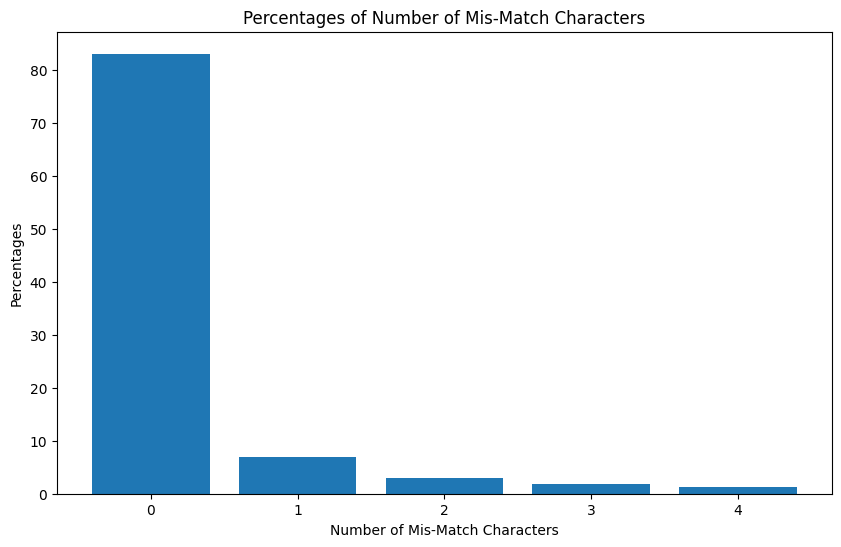

0  Mis-Match Characters Percentage:  83.0  %
1  Mis-Match Characters Percentage:  6.93  %
2  Mis-Match Characters Percentage:  2.97  %
3  Mis-Match Characters Percentage:  1.79  %
4  Mis-Match Characters Percentage:  1.29  %


In [177]:
mis_match_character_analysis_plot(mis_match_cnts_1,12000)

Synth Text Test Data

In [178]:
test_img_names=test_data['ImageName'].values
test_labels=test_data['Labels'].values

In [ ]:
synth_test_accuracy,synth_test_letter_acc,synth_test_letter_cnt,synth_test_mis_match=test_data_output_Prediction(model,test_img_names,test_labels)

1/1 [==============================] - 0s 52ms/step
Processed  1000  Images
1/1 [==============================] - 0s 55ms/step
Processed  2000  Images
1/1 [==============================] - 0s 56ms/step
Processed  3000  Images
1/1 [==============================] - 0s 63ms/step
Processed  4000  Images
1/1 [==============================] - 0s 77ms/step
Processed  5000  Images
1/1 [==============================] - 0s 60ms/step
Processed  6000  Images
1/1 [==============================] - 0s 67ms/step
Processed  7000  Images
1/1 [==============================] - 0s 69ms/step
Processed  8000  Images
1/1 [==============================] - 0s 72ms/step
Processed  9000  Images
1/1 [==============================] - 0s 99ms/step
Processed  10000  Images
1/1 [==============================] - 0s 81ms/step
Processed  11000  Images
1/1 [==============================] - 0s 65ms/step
Processed  12000  Images
1/1 [==============================] - 0s 78ms/step
Processed  13000  Images
1/1 [===

In [ ]:
print("Model Output Accuracy: ",(synth_test_accuracy/len(test_labels))*100, " %")
print("Model Output Letter Accuracy: ",(synth_test_letter_acc/synth_test_letter_cnt)*100, " %")

In [ ]:
model_1_test_mis_match_dict=Counter(synth_test_mis_match)

In [ ]:
mis_match_cnts_2=[]
for i in range(5):
    mis_match_cnts_2.append(model_1_test_mis_match_dict[i])

In [ ]:
mis_match_character_analysis_plot(mis_match_cnts_2,15000)

Model 2 Predictions

In [ ]:
model_2=Image_text_recogniser_model_2('predict')

In [185]:
model_2.load_weights('C:\\Users\\AkshayPatil\\Desktop\\Falcon\\PDF_OCR\\Best_Img_recog_GRU_RAdam_model_run_weights.h5')

In [186]:
val_img_names=val_data['ImageName'].values
val_labels=val_data['Labels'].values

In [ ]:
synth_val_accuracy,synth_val_letter_acc,synth_val_letter_cnt,synth_val_mis_match=test_data_output_Prediction(model_2,val_img_names,val_labels)

1/1 [==============================] - 0s 136ms/step
Processed  1000  Images
1/1 [==============================] - 0s 184ms/step
Processed  2000  Images
1/1 [==============================] - 0s 192ms/step
Processed  3000  Images
1/1 [==============================] - 0s 168ms/step
Processed  4000  Images
1/1 [==============================] - 0s 168ms/step
Processed  5000  Images
1/1 [==============================] - 0s 264ms/step
Processed  6000  Images
1/1 [==============================] - 0s 184ms/step
Processed  7000  Images
1/1 [==============================] - 0s 168ms/step
Processed  8000  Images
1/1 [==============================] - 0s 168ms/step
Processed  9000  Images
1/1 [==============================] - 0s 176ms/step


In [1]:
print("Model Output Accuracy: ",(synth_val_accuracy/len(val_labels))*100, " %")
print("Model Output Letter Accuracy: ",(synth_val_letter_acc/synth_val_letter_cnt)*100, " %")

NameError: name 'synth_val_accuracy' is not defined

In [ ]:
model_2_val_mis_match_dict=Counter(synth_val_mis_match)

In [ ]:
mis_match_cnts_3=[]
for i in range(5):
    mis_match_cnts_3.append(model_2_val_mis_match_dict[i])

In [ ]:
mis_match_character_analysis_plot(mis_match_cnts_3,12000)

Synth Text Test Data model 2

In [ ]:
test_img_names=test_data['ImageName'].values
test_labels=test_data['Labels'].values

In [ ]:
synth_test_accuracy,synth_test_letter_acc,synth_test_letter_cnt,synth_test_mis_match=test_data_output_Prediction(model_2,test_img_names,test_labels)

Plot training examples with TensorBoard

In [141]:
logdir = "C:\\Users\\AkshayPatil\\Desktop\\Falcon\\PDF_OCR\\Train_data\\"

In [142]:
file_writer = tf.summary.create_file_writer(logdir)

In [151]:
import numpy as np

with file_writer.as_default():
    images = np.reshape(train_images[:784], (-1, 28, 28, 1))
    tf.summary.image("20 Digits", images, max_outputs=25, step=0)

TypeError: Cannot convert 255.5 to EagerTensor of dtype string